In [8]:
# Import necessary libraries for machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
#read the data
df = pd.read_csv('C:/Users/ADMIN/OneDrive/Documents/DataScienceProjects/Vertebrate/data/vertebrate.csv')
df.head()

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians


In [18]:
# assigning the dataframe
data=df

In [11]:
# Prepare features (X) and target (y)
X = data.drop(columns=['Name', 'Class'])
y = data['Class']

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 99)

In [13]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=1)

In [14]:
# Fit the model to the training data
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8


In [16]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}

tree = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, 
                           cv=2, verbose=True)
grid_search.fit(X_train, y_train)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 2 folds for each of 1620 candidates, totalling 3240 fits


c:\Users\ADMIN\OneDrive\Documents\DataScienceProjects\Vertebrate\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


best accuracy 0.6
DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)


c:\Users\ADMIN\OneDrive\Documents\DataScienceProjects\Vertebrate\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


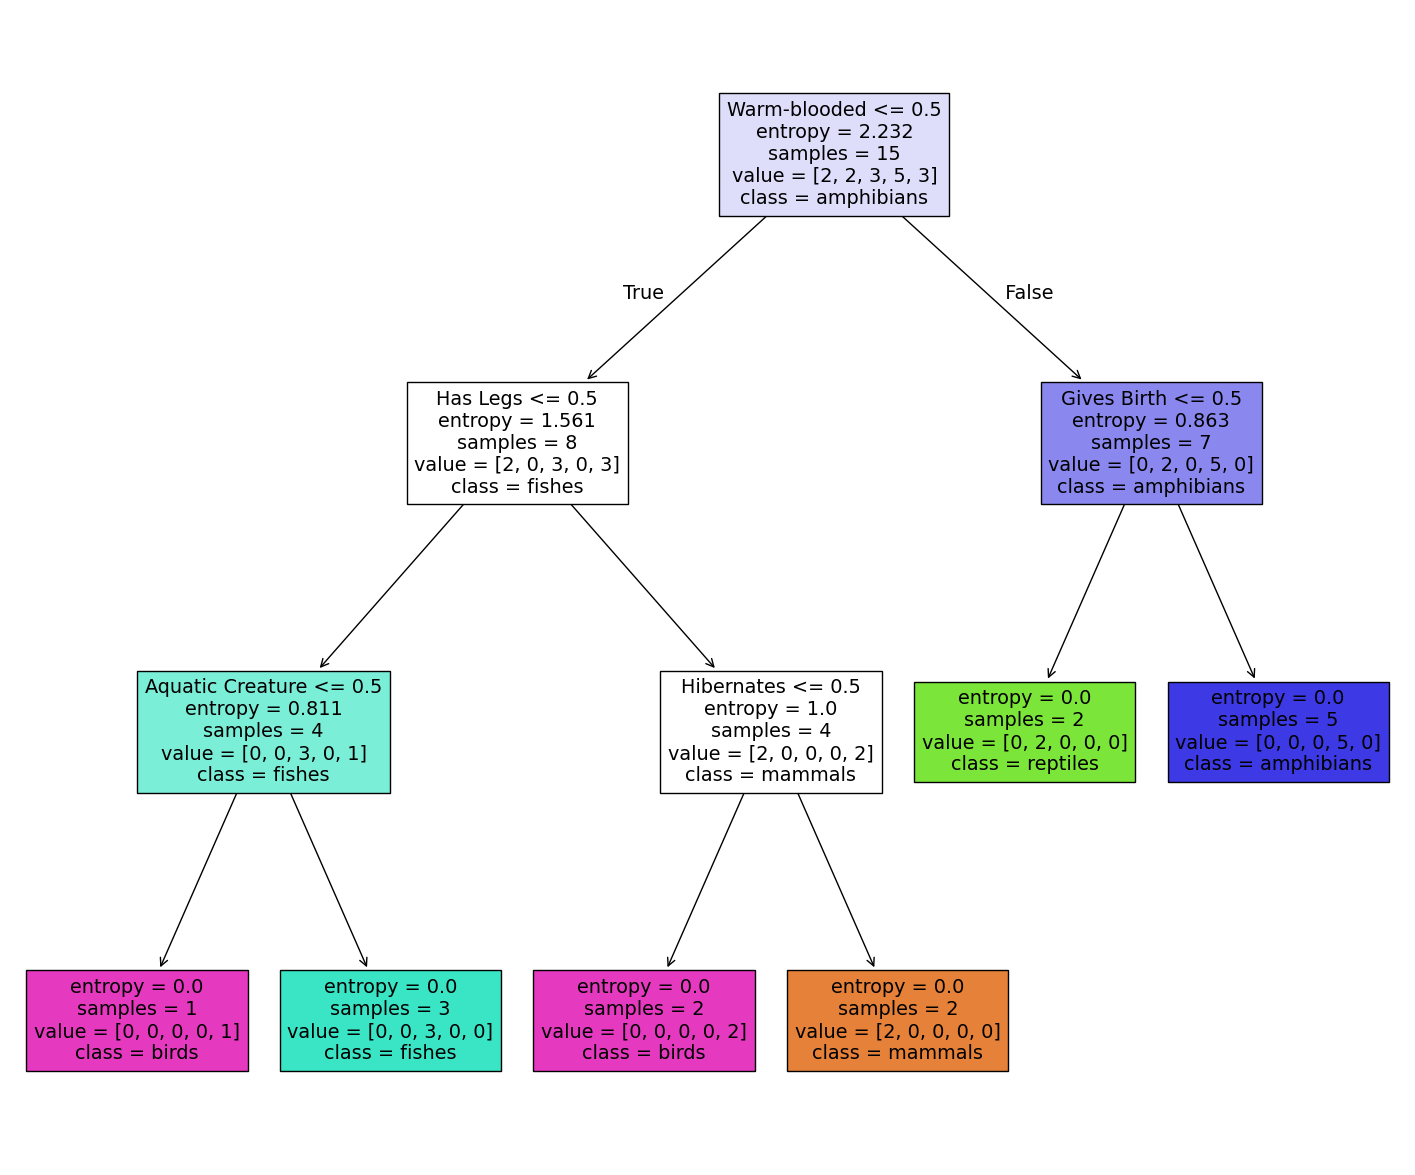

In [17]:
# Plot the decision tree using the best estimator
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Use the vertebrate dataset (X, y) and param_grid already defined

# Perform grid search
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X, y)

# Get the best estimator
tree_clf = grid_search.best_estimator_

# Plot the decision tree
plt.figure(figsize=(18, 15))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=y.unique())
plt.show()
